## Import Packages

In [43]:
import pickle
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.cluster import SilhouetteVisualizer
from kneed import KneeLocator

## Import .csv as dataframe containing song collection

In [8]:
df_master = pd.read_csv("3983_Song_Collection.csv")

In [12]:
df_master

song_name        song_artist  danceability  energy  \
0                        Endless Sky              Dusky         0.750   0.821   
1     B.O.T.A. (Baddest Of Them All)         Eliza Rose         0.756   0.962   
2                        Setting Sun  George FitzGerald         0.546   0.870   
3                                ATK             Bonobo         0.705   0.880   
4             Dancing In The Shadows               TSHA         0.576   0.848   
...                              ...                ...           ...     ...   
3978                         Changes         Mike Perry         0.716   0.748   
3979                Everlasting Love        Love Affair         0.497   0.569   
3980                 I Want You Back      The Jackson 5         0.670   0.584   
3981        Love the One You're With     Stephen Stills         0.566   0.527   
3982              Castle on the Hill         Ed Sheeran         0.461   0.834   

      loudness  speechiness  acousticness  instrumentalness  liveness  \
0       -6.504       0.0437       0.13600          0.050300    0.3250   
1       -7.526       0.0583       0.06710          0.703000    0.1940   
2       -6.795       0.0384       0.00362          0.659000    0.0527   
3       -8.887       0.0631       0.00481          0.862000    0.0512   
4       -5.935       0.0333       0.00161          0.001440    0.1100   
...        ...          ...           ...               ...       ...   
3978    -4.656       0.0364       0.06670          0.000000    0.0581   
3979   -10.632       0.0386       0.26600          0.000000    0.3360   
3980    -8.325       0.0340       0.43900          0.006140    0.1780   
3981   -11.216       0.0340       0.03000          0.000003    0.1150   
3982    -4.868       0.0989       0.02320          0.000011    0.1400   

      valence    tempo                      id  duration_ms  
0       0.654  130.015  3oHOObxpYRdsRwVqizxWNM       159562  
1       0.749  136.981  45bfH0GZvUyujIBiKRhXso       358267  
2       0.036  129.998  4BG4Smwt9cu1RzAKurrIN6       373167  
3       0.581  127.982  3AaGCSpUFAmtB1XGxz5IWk       245208  
4       0.532  130.026  2edB8M0PPZCoYKm8ohDaNm       277433  
...       ...      ...                     ...          ...  
3978    0.469  120.033  5FQEeo3o0tPNxrsQPcmwlX       142019  
3979    0.811  120.531  40XXjm2pU6LGZkLq5VmkaQ       182667  
3980    0.944   98.185  3tSi6iFO9yLGIYIqMEgjC9       179227  
3981    0.157   97.281  3NNkJwiHucP5QyUEAIMXra       184733  
3982    0.471  135.007  66qlqxhEMpSHOzjRK4il0b       261154  

[3983 rows x 13 columns]

## K Means

### Create Scaler

In [13]:
X = df_master[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 
               'liveness', 'valence', 'tempo']]

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X_scaled_df.head())

danceability    energy  loudness  speechiness  acousticness  \
0      1.251458  0.618179  0.306351    -0.409531     -0.403654   
1      1.290853  1.106474  0.127459    -0.221451     -0.597676   
2     -0.087987  0.787870  0.255414    -0.477807     -0.776435   
3      0.955992  0.822501 -0.110771    -0.159616     -0.773084   
4      0.108990  0.711683  0.405949    -0.543506     -0.782095   

   instrumentalness  liveness   valence     tempo  
0         -0.778241  1.032923  1.269545 -0.124882  
1          0.879197  0.119433  1.659899  0.071676  
2          0.767465 -0.865881 -1.269811 -0.125362  
3          1.282955 -0.876341  0.969589 -0.182247  
4         -0.902314 -0.466317  0.768248 -0.124572

### Finding Optimal K

#### Elbow

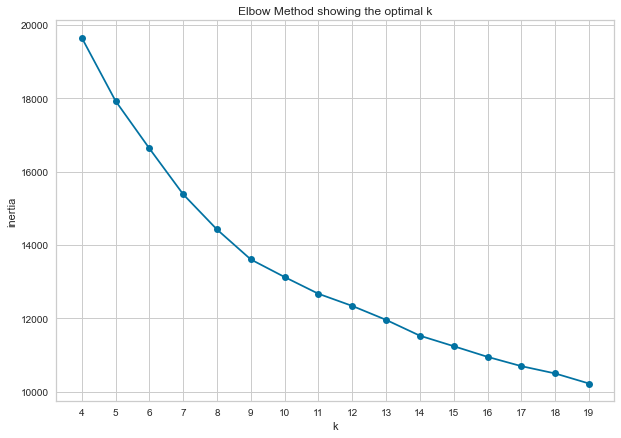

In [39]:
K = list(range(4,20))
inertia = []

for k in K:
    #print("Training a K-Means model with {} clusters! ".format(k))
    kmeans = KMeans(n_clusters=k,
                    random_state=42)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,7))
plt.plot(K, inertia, marker="o")
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')
plt.show()

**`ELBOW method:`** <br>
no clean optimal K / maybe 5, maybe 9

Optimal number of clusters 9


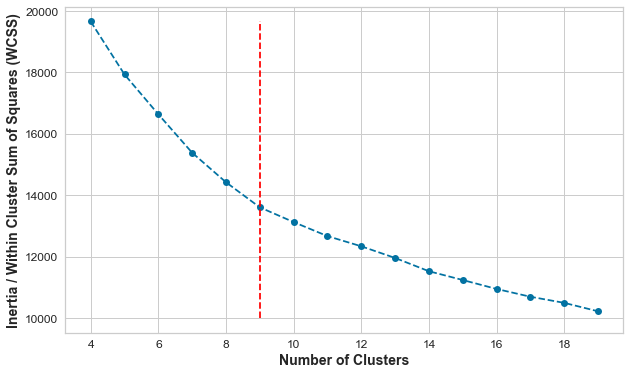

In [57]:
n_clusters = KneeLocator(K, inertia, curve='convex', direction='decreasing').knee
print("Optimal number of clusters", n_clusters)
    
fig = plt.figure(figsize=(10,6))
plt.plot(K, inertia, marker='o', linestyle='--')
plt.vlines(n_clusters, ymin=10000 , ymax=max(inertia), linestyles='dashed', color="red")
plt.xlabel('Number of Clusters', weight="bold", fontsize=14)
plt.ylabel('Inertia / Within Cluster Sum of Squares (WCSS)', weight="bold", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**`ELBOW method - Knee Location`** <br>
suggest optimal K = 9

#### Silouhette

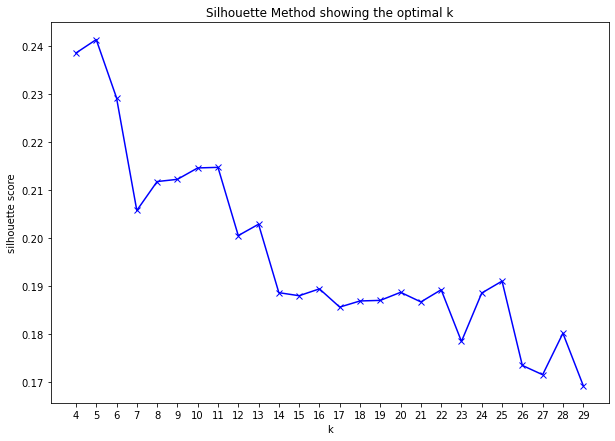

In [19]:
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
    #filename = "Model/kmeans_" + str(k) + ".pickle"
    #with open(filename, "wb") as f:
        #pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))

plt.figure(figsize=(10,7))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')
plt.show()

**`SILHOUETTE method:`** <br>
optimal K = 5? <br>
seems too low to accommodate the vast amount of different music <br>
second maximum = 11 <br>
so maybe pick 9 or 11

##### Visualizing different silhouette plots with varying Ks

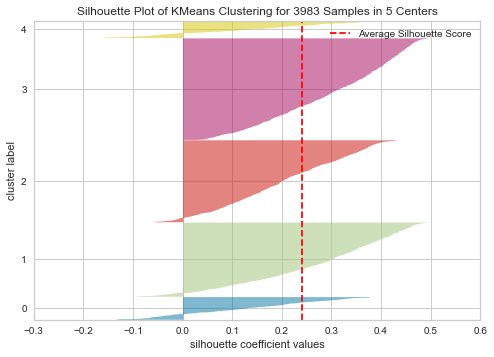

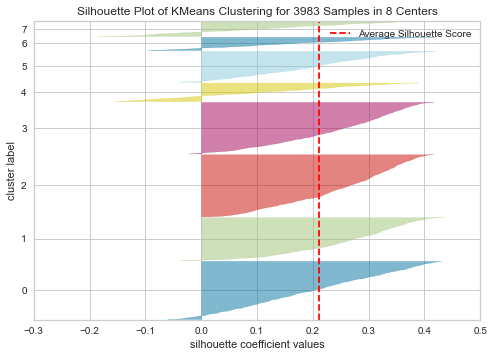

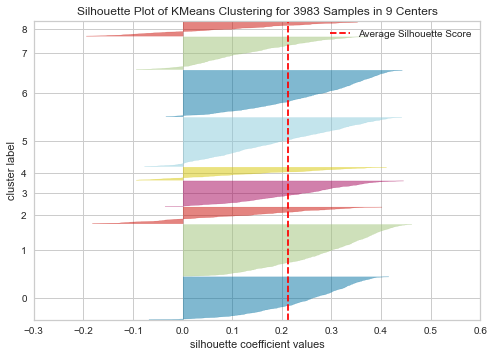

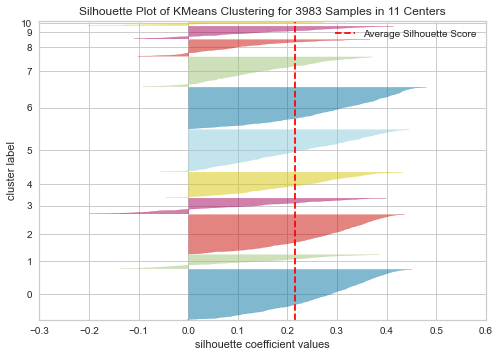

In [38]:
K_list = [5,8,9,11]

for K in K_list:

    model = KMeans(K, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure
    plt.show()

### Clustering with K-Means

In [75]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=9, random_state=42)

##### Checking Cluster Populations

<AxesSubplot:>

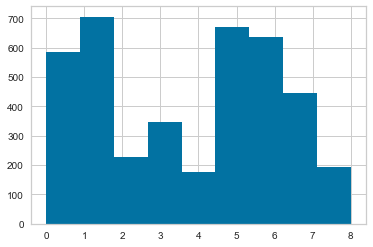

In [84]:
clusters = kmeans.predict(X_scaled_df)
clusters_series = pd.Series(clusters)
clusters_series.value_counts().sort_index()

x = list(range(n_clusters))
y_heights = list(clusters_series.value_counts().sort_index().values)
x, y_heights

clusters_series.hist(bins=n_clusters)

## Reintroducing Clusters into original Dataframe

df_master["cluster"] = clusters

df_master.to_csv("3983_Song_Collection_CLUSTERED.csv", index=False)

## Saving model & scaler with Pickle

#scaler = StandardScaler()
#model = KMeans()

with open("Model/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("Model/kmeans_9.pickle", "wb") as f:
    pickle.dump(kmeans,f)

pathlist = [r"C:\Users\p.kollhof\Documents\IRONHACK_GitHub\Spotify_Song_Recommender\Song_Collection_Batches\Batch" + \
 str(n) + ".csv" for n in range(1,14)]

df_batch_1 = pd.read_csv(pathlist[0])
df_batch_2 = pd.read_csv(pathlist[1])
df_batch_3 = pd.read_csv(pathlist[2])
df_batch_4 = pd.read_csv(pathlist[3])
df_batch_5 = pd.read_csv(pathlist[4])
df_batch_6 = pd.read_csv(pathlist[5])
df_batch_7 = pd.read_csv(pathlist[6])
df_batch_8 = pd.read_csv(pathlist[7])
df_batch_9 = pd.read_csv(pathlist[8])
df_batch_10 = pd.read_csv(pathlist[9])
df_batch_11 = pd.read_csv(pathlist[10])
df_batch_12 = pd.read_csv(pathlist[11])
df_batch_13 = pd.read_csv(pathlist[12])

df_master_batch = pd.concat([df_batch_1, df_batch_2, df_batch_3, df_batch_4, df_batch_5, 
                             df_batch_6, df_batch_7, df_batch_8, df_batch_9, df_batch_10,
                             df_batch_11, df_batch_12, df_batch_13]).reset_index(drop=True)

df_song_infos = pd.read_csv("Song_Infos.csv")

print(f"Length Master: {len(df_master_batch)} // Length Slave: {len(df_song_infos)}")

song_ids_master = list(df_master_batch["id"])
song_ids_slave = list(df_song_infos["id"])

df_combi = df_song_infos[pd.DataFrame(df_song_infos["id"].tolist()).isin(song_ids_master).any(1)].reset_index(drop=True)
df_complete = pd.concat([df_combi[["song_name", "song_artist"]], df_master_batch], axis=1)
df_complete.drop_duplicates(inplace=True)
#df_complete.to_csv(str(len(df_complete)) + "_Song_Collection.csv", index=False)